In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from numpy.random import seed
from sklearn import metrics
seed(42)
from sklearn.metrics import confusion_matrix
from utils.metrics import evaluate
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model, svm
from utils.plots import bar_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot
import tensorflow as tf 

In [2]:
df = pd.read_csv('HODARM_data.csv')
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Date,,,,,,,,,,,
2020-10-23,186,9,4,75.3,12,20,16,21,19,27,25
2020-10-24,181,7,2,76.0,14,15,17,21,18,38,25
2020-10-25,201,8,4,75.0,17,23,17,20,18,37,25
2020-10-26,198,8,2,76.0,11,0,14,18,24,32,25
2020-10-27,208,8,1,75.2,7,20,12,34,9,20,25


In [4]:
df.tail()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Date,,,,,,,,,,,
2022-03-16,24,0,0,80.0,1,6,6,31,39,37,0
2022-03-17,25,0,0,80.0,2,5,6,37,38,43,0
2022-03-18,28,0,0,82.0,1,7,6,39,32,45,0
2022-03-19,26,2,0,84.0,0,7,6,37,36,43,0
2022-03-20,23,2,0,80.0,0,6,6,50,23,56,0


In [5]:
df.shape

(514, 11)

In [6]:
df.columns.values

array(['Admission_Total', 'Mortality', 'U60_Mortality', 'O2_saturation',
       'ICU_ADD', 'Non_invasive_ventialion ', 'Inutabet_C19_Pt',
       'Non-intubated_C19_PT', 'Free_Ventilators', 'Using_Ventialtors',
       'Infected_paramedics'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 514 entries, 2020-10-23 to 2022-03-20
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Admission_Total           514 non-null    int64  
 1   Mortality                 514 non-null    int64  
 2   U60_Mortality             514 non-null    int64  
 3   O2_saturation             514 non-null    float64
 4   ICU_ADD                   514 non-null    int64  
 5   Non_invasive_ventialion   514 non-null    int64  
 6   Inutabet_C19_Pt           514 non-null    int64  
 7   Non-intubated_C19_PT      514 non-null    int64  
 8   Free_Ventilators          514 non-null    int64  
 9   Using_Ventialtors         514 non-null    int64  
 10  Infected_paramedics       514 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 48.2 KB


In [8]:
df.describe()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,102.361868,2.698444,0.799611,81.961284,5.902724,13.756809,7.332685,26.066148,27.064202,33.229572,5.367704
std,84.547698,2.938041,2.768649,5.454737,8.857672,10.161906,5.347224,7.945201,12.227289,6.247481,8.265750
min,7.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.000000,0.000000
25%,30.000000,0.000000,0.000000,80.000000,0.000000,6.000000,3.000000,21.000000,21.000000,29.000000,1.000000
50%,72.000000,2.000000,0.000000,81.000000,1.000000,10.000000,6.000000,25.000000,25.000000,33.000000,2.000000
75%,173.000000,4.000000,1.000000,85.000000,9.000000,21.000000,11.000000,31.000000,31.000000,37.000000,6.000000
max,333.000000,18.000000,58.000000,93.300000,47.000000,43.000000,25.000000,50.000000,214.000000,56.000000,55.000000


In [9]:
def miss_data(x):
    total = x.isnull().sum()
    percent = (x.isnull().sum()/x.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(x[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [10]:
miss_data(df)

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


In [11]:
for x in df.columns:
    if df[x].dtype=='int64' or  df[x].dtype=='float64':
        df[x].fillna(df[x].mean())

df = df.fillna(-999)

for y in df.columns:
    if df[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[y].values))
        df[y] = lbl.transform(list(df[y].values))

In [12]:
threshold = 0.92
corr_matrix = df.corr().abs()
corr_matrix.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Admission_Total,1.000000,0.711889,0.193374,0.570171,0.859985,0.872307,0.795409,0.635542,0.186492,0.136633,0.468613
Mortality,0.711889,1.000000,0.276289,0.507063,0.601474,0.628571,0.648380,0.522061,0.151882,0.128439,0.354784
U60_Mortality,0.193374,0.276289,1.000000,0.146382,0.189257,0.165380,0.181476,0.130547,0.042230,0.022466,0.095390
O2_saturation,0.570171,0.507063,0.146382,1.000000,0.383016,0.497883,0.577161,0.250193,0.023059,0.163494,0.303749
ICU_ADD,0.859985,0.601474,0.189257,0.383016,1.000000,0.762998,0.678156,0.461118,0.144973,0.018688,0.400442


In [13]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Admission_Total,NaN,0.711889,0.193374,0.570171,0.859985,0.872307,0.795409,0.635542,0.186492,0.136633,0.468613
Mortality,NaN,NaN,0.276289,0.507063,0.601474,0.628571,0.648380,0.522061,0.151882,0.128439,0.354784
U60_Mortality,NaN,NaN,NaN,0.146382,0.189257,0.165380,0.181476,0.130547,0.042230,0.022466,0.095390
O2_saturation,NaN,NaN,NaN,NaN,0.383016,0.497883,0.577161,0.250193,0.023059,0.163494,0.303749
ICU_ADD,NaN,NaN,NaN,NaN,NaN,0.762998,0.678156,0.461118,0.144973,0.018688,0.400442


In [146]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
df = df.drop(columns = to_drop)
print('Data shape: ', df.shape)
print('Size of the data', df.shape)

There are 0 columns to remove.
Data shape:  (514, 11)
Size of the data (514, 11)


In [147]:
X = df.drop(['Admission_Total'], axis=1)
y = df['Admission_Total']

In [148]:
# Split 30% for test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [149]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(359, 10) (155, 10) (359,) (155,)


In [150]:
resultsDict = {}
predictionsDict = {}

In [151]:
cols = X_train.columns
scaler = MinMaxScaler(feature_range=(0, 1))
t_X_train = scaler.fit_transform(X_train)
t_X_test = scaler.transform(X_test)
X_train = pd.DataFrame(t_X_train, columns=[cols])
X_test = pd.DataFrame(t_X_test, columns=[cols])

### Bayesian regression

In [152]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(y_test, yhat)
predictionsDict['BayesianRidge'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 615.14


### Lesso

In [153]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Lasso'] = evaluate(y_test, yhat)
predictionsDict['Lasso'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 624.62


### Random Forest

In [154]:
reg = RandomForestRegressor(n_estimators=100,random_state=137)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['RandomForest'] = evaluate(y_test, yhat)
predictionsDict['RandomForest'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 386.65


###  XGBoost

In [155]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(y_test, yhat)
predictionsDict['XGBoost'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 439.21


### Support vector machines

In [156]:
reg = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM RBF'] = evaluate(y_test, yhat)
predictionsDict['SVM RBF'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 583.04


### Nearest neighbors

In [157]:
reg = neighbors.KNeighborsRegressor(10, weights='distance', metric='euclidean')
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['KNN'] = evaluate(y_test, yhat)
predictionsDict['KNNF'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 394.68


### LinearRegression

In [158]:
reg = linear_model.LinearRegression(normalize=False)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['LinearRegression'] = evaluate(y_test, yhat)
predictionsDict['LinearRegression'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 614.39


### MLP

In [159]:
reg = MLPRegressor(hidden_layer_sizes=(75, 25), learning_rate='adaptive', verbose=True,
                   activation='relu', solver='lbfgs', max_iter=500)

reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['MLP'] = evaluate(y_test, yhat)
predictionsDict['MLP'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 470.90


### DecisionTreeClassifier

In [160]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['DecisionTreeClassifier'] = evaluate(y_test, yhat)
predictionsDict['DecisionTreeClassifier'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 1191.20


### Linear Discriminant Analyser Model


In [161]:
reg = LinearDiscriminantAnalysis()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['LDA'] = evaluate(y_test, yhat)
predictionsDict['LDA'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 670.97


### LSTM

In [185]:
tt_X_train = t_X_train.reshape((t_X_train.shape[0], 1, t_X_train.shape[1]))
tt_X_test = t_X_test.reshape((t_X_test.shape[0], 1, t_X_test.shape[1]))

print(tt_X_train.shape, tt_X_test.shape, y_train.shape, y_test.shape)
tt_X_train

(359, 1, 10) (155, 1, 10) (359,) (155,)


array([[[0.05555556, 0.        , 0.87043189, ..., 0.05339806,
         0.63043478, 0.01886792]],

       [[0.        , 0.        , 0.69767442, ..., 0.10194175,
         0.32608696, 0.01886792]],

       [[0.22222222, 0.        , 0.50830565, ..., 0.07281553,
         0.47826087, 0.        ]],

       ...,

       [[0.11111111, 0.        , 0.58139535, ..., 0.11650485,
         0.54347826, 0.03773585]],

       [[0.11111111, 0.        , 0.56478405, ..., 0.04368932,
         0.58695652, 0.05660377]],

       [[0.11111111, 0.01724138, 0.58139535, ..., 0.07281553,
         0.56521739, 0.01886792]]])

In [188]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(tt_X_train.shape[1], tt_X_train.shape[2]),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))
#model = Sequential()

#model.add(LSTM(70, activation = 'relu', return_sequences = True, input_shape=(tt_X_train.shape[1], tt_X_train.shape[2])))
#model.add(LSTM(50, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fitting the model
history = model.fit(tt_X_train, y_train, epochs=20, batch_size=70, validation_data=(tt_X_test, y_test), verbose=2, shuffle=False)

Epoch 1/20
6/6 - 11s - loss: 17173.6191 - val_loss: 18616.4609 - 11s/epoch - 2s/step
Epoch 2/20
6/6 - 0s - loss: 17165.9004 - val_loss: 18605.5781 - 95ms/epoch - 16ms/step
Epoch 3/20
6/6 - 0s - loss: 17153.0449 - val_loss: 18586.0332 - 89ms/epoch - 15ms/step
Epoch 4/20
6/6 - 0s - loss: 17130.2402 - val_loss: 18548.8574 - 86ms/epoch - 14ms/step
Epoch 5/20
6/6 - 0s - loss: 17086.7695 - val_loss: 18475.7598 - 85ms/epoch - 14ms/step
Epoch 6/20
6/6 - 0s - loss: 16999.1387 - val_loss: 18331.6719 - 87ms/epoch - 15ms/step
Epoch 7/20
6/6 - 0s - loss: 16830.3008 - val_loss: 18068.4805 - 83ms/epoch - 14ms/step
Epoch 8/20
6/6 - 0s - loss: 16541.2090 - val_loss: 17672.9395 - 85ms/epoch - 14ms/step
Epoch 9/20
6/6 - 0s - loss: 16141.1660 - val_loss: 17225.5781 - 84ms/epoch - 14ms/step
Epoch 10/20
6/6 - 0s - loss: 15733.6768 - val_loss: 16841.8184 - 87ms/epoch - 15ms/step
Epoch 11/20
6/6 - 0s - loss: 15410.3818 - val_loss: 16570.6348 - 88ms/epoch - 15ms/step
Epoch 12/20
6/6 - 0s - loss: 15168.5947 - v

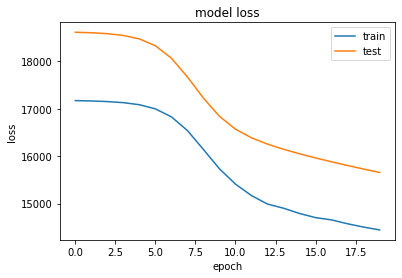

In [189]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [190]:
yhat = model.predict(tt_X_test).reshape(1, -1)[0]
resultsDict['LSTM'] = evaluate(y_test, yhat)
predictionsDict['LSTM'] = yhat

5/5 [==============================] - 2s 7ms/step


In [191]:
resultsDict

{'BayesianRidge': {'mae': 17.926866059196374,
  'rmse': 24.802088237445417,
  'mape': 0.3138155708017384,
  'r2': 0.9164853033069176},
 'Lasso': {'mae': 18.113613345509062,
  'rmse': 24.99247635051399,
  'mape': 0.3217032054830757,
  'r2': 0.9151982154869239},
 'RandomForest': {'mae': 12.803032258064514,
  'rmse': 19.66336280431691,
  'mape': 0.18956485723117847,
  'r2': 0.9475069271372495},
 'XGBoost': {'mae': 14.180501913255261,
  'rmse': 20.957242379184095,
  'mape': 0.20521224793047,
  'r2': 0.940371390205117},
 'SVM RBF': {'mae': 17.48884373744746,
  'rmse': 24.14622623523518,
  'mape': 0.28532102977322876,
  'r2': 0.9208437990259191},
 'KNN': {'mae': 13.594946507358799,
  'rmse': 19.866533925405825,
  'mape': 0.19536434170546133,
  'r2': 0.9464165566990972},
 'LinearRegression': {'mae': 17.874471410235813,
  'rmse': 24.786928450919735,
  'mape': 0.3122374689352859,
  'r2': 0.9165873655230427},
 'MLP': {'mae': 15.240207736677407,
  'rmse': 21.700169917954995,
  'mape': 0.233759414

In [192]:
df_input=df[['Admission_Total', 'Mortality', 'U60_Mortality', 'O2_saturation',
       'ICU_ADD', 'Non_invasive_ventialion ', 'Inutabet_C19_Pt',
       'Non-intubated_C19_PT', 'Free_Ventilators', 'Using_Ventialtors',
       'Infected_paramedics']]


In [193]:
scaler = MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)


In [199]:
data_scaled


array([[0.54907975, 0.5       , 0.06896552, ..., 0.05339806, 0.36956522,
        0.45454545],
       [0.53374233, 0.38888889, 0.03448276, ..., 0.04854369, 0.60869565,
        0.45454545],
       [0.59509202, 0.44444444, 0.06896552, ..., 0.04854369, 0.58695652,
        0.45454545],
       ...,
       [0.06441718, 0.        , 0.        , ..., 0.11650485, 0.76086957,
        0.        ],
       [0.05828221, 0.11111111, 0.        , ..., 0.13592233, 0.7173913 ,
        0.        ],
       [0.04907975, 0.11111111, 0.        , ..., 0.07281553, 1.        ,
        0.        ]])

In [207]:
features = data_scaled
target = data_scaled[:,0]


In [204]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.30,random_state=123,shuffle=False)

In [205]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(359, 11) (155, 11) (359,) (155,)


In [177]:
win_length=1
batch_size=32
num_features=10
train_generator = TimeseriesGenerator(xtrain, ytrain, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(xtest, ytest, length=win_length, sampling_rate=1, batch_size=batch_size)

In [178]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))

In [179]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 1, 128)            71168     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1, 128)            0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 128)            131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 1, 128)            0         
                                                                 
 dropout_8 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [180]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [181]:
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)

In [182]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    shuffle=False,
    callbacks = [early_stopping]
)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Specified a list with shape [?,10] from a tensor with shape [32,11]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential_5/lstm_13/PartitionedCall]] [Op:__inference_train_function_53799]

In [ ]:
model.evaluate_generator(test_generator,verbose=0)

In [129]:
predictions = model.predict_generator(test_generator)

In [130]:
predictions.shape

(145, 1)

In [106]:
yhat = predictions.flatten()

In [107]:
xtest[:,1:][win_length:]


array([[0.22222222, 0.01724138, 0.69069069, ..., 0.07281553, 0.52173913,
        0.03636364],
       [0.11111111, 0.        , 0.69069069, ..., 0.04368932, 0.67391304,
        0.        ],
       [0.16666667, 0.01724138, 0.69069069, ..., 0.03398058, 0.67391304,
        0.03636364],
       ...,
       [0.        , 0.        , 0.66066066, ..., 0.11650485, 0.76086957,
        0.        ],
       [0.11111111, 0.        , 0.72072072, ..., 0.13592233, 0.7173913 ,
        0.        ],
       [0.11111111, 0.        , 0.6006006 , ..., 0.07281553, 1.        ,
        0.        ]])

In [108]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(xtest[:,1:][win_length:])],axis=1)


In [109]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9
0,0.130866,0.222222,0.017241,0.690691,0.000000,0.325581,0.24,0.56,0.072816,0.521739,0.036364
1,0.132742,0.111111,0.000000,0.690691,0.021277,0.209302,0.32,0.66,0.043689,0.673913,0.000000
2,0.125182,0.166667,0.017241,0.690691,0.000000,0.511628,0.24,0.70,0.033981,0.673913,0.036364
3,0.128431,0.166667,0.034483,0.690691,0.000000,0.209302,0.20,0.70,0.019417,0.565217,0.036364
4,0.130898,0.055556,0.000000,0.630631,0.021277,0.232558,0.24,0.62,0.063107,0.586957,0.036364
...,...,...,...,...,...,...,...,...,...,...,...
145,0.103738,0.000000,0.000000,0.600601,0.021277,0.139535,0.24,0.62,0.150485,0.586957,0.000000
146,0.100193,0.000000,0.000000,0.600601,0.042553,0.116279,0.24,0.74,0.145631,0.717391,0.000000
147,0.099972,0.000000,0.000000,0.660661,0.021277,0.162791,0.24,0.78,0.116505,0.760870,0.000000
148,0.098746,0.111111,0.000000,0.720721,0.000000,0.162791,0.24,0.74,0.135922,0.717391,0.000000


In [110]:
rev_trans=scaler.inverse_transform(df_pred)


In [111]:
rev_trans


array([[49.66230825,  4.        ,  1.        , ..., 23.        ,
        34.        ,  2.        ],
       [50.27381027,  2.        ,  0.        , ..., 17.        ,
        41.        ,  0.        ],
       [47.80919689,  3.        ,  1.        , ..., 15.        ,
        41.        ,  2.        ],
       ...,
       [39.5907197 ,  0.        ,  0.        , ..., 32.        ,
        45.        ,  0.        ],
       [39.19133744,  2.        ,  0.        , ..., 36.        ,
        43.        ,  0.        ],
       [40.04850703,  2.        ,  0.        , ..., 23.        ,
        56.        ,  0.        ]])

In [112]:
df_final=df_input[predictions.shape[0]*-1:]


In [113]:
df_final.count()


Admission_Total             150
Mortality                   150
U60_Mortality               150
O2_saturation               150
ICU_ADD                     150
Non_invasive_ventialion     150
Inutabet_C19_Pt             150
Non-intubated_C19_PT        150
Free_Ventilators            150
Using_Ventialtors           150
Infected_paramedics         150
dtype: int64

In [114]:
df_final=df_input[predictions.shape[0]*-1:]


In [115]:
df_final.count()


Admission_Total             150
Mortality                   150
U60_Mortality               150
O2_saturation               150
ICU_ADD                     150
Non_invasive_ventialion     150
Inutabet_C19_Pt             150
Non-intubated_C19_PT        150
Free_Ventilators            150
Using_Ventialtors           150
Infected_paramedics         150
dtype: int64

In [116]:
df_final['Admission_Total_pred']=rev_trans[:,0]
df_final

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics,Admission_Total_pred
Date,,,,,,,,,,,,
2021-10-22,73,4,1,83.0,0,14,6,28,23,34,2,49.662308
2021-10-23,77,2,0,83.0,1,9,8,33,17,41,0,50.273810
2021-10-24,76,3,1,83.0,0,22,6,35,15,41,2,47.809197
2021-10-25,71,3,2,83.0,0,9,5,35,12,36,2,48.868567
2021-10-26,66,1,0,81.0,1,10,6,31,21,37,2,49.672796
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,24,0,0,80.0,1,6,6,31,39,37,0,40.818441
2022-03-17,25,0,0,80.0,2,5,6,37,38,43,0,39.663013
2022-03-18,28,0,0,82.0,1,7,6,39,32,45,0,39.590720


<AxesSubplot:xlabel='Date'>

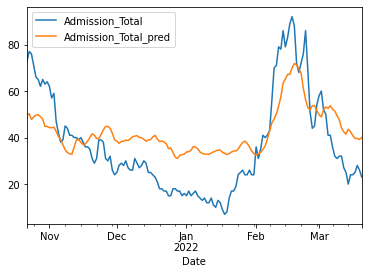

In [117]:
df_final[['Admission_Total','Admission_Total_pred']].plot()


In [121]:
yhat.shape

(150,)

In [119]:
ytest

array([0.25766871, 0.2392638 , 0.21779141, 0.23619632, 0.25153374,
       0.20245399, 0.21472393, 0.21165644, 0.19631902, 0.1809816 ,
       0.17791411, 0.16871166, 0.17791411, 0.17177914, 0.17484663,
       0.16871166, 0.15337423, 0.1595092 , 0.12269939, 0.10736196,
       0.09509202, 0.09815951, 0.11656442, 0.11349693, 0.10429448,
       0.10429448, 0.10122699, 0.10122699, 0.09815951, 0.10122699,
       0.09509202, 0.08895706, 0.08895706, 0.08588957, 0.07361963,
       0.06748466, 0.07361963, 0.09815951, 0.09815951, 0.09509202,
       0.07361963, 0.07055215, 0.07668712, 0.05828221, 0.05214724,
       0.05521472, 0.06441718, 0.06748466, 0.06441718, 0.07055215,
       0.06134969, 0.05828221, 0.05828221, 0.07361963, 0.06748466,
       0.06134969, 0.06441718, 0.07055215, 0.06748466, 0.05521472,
       0.05521472, 0.05214724, 0.04907975, 0.04294479, 0.03374233,
       0.03374233, 0.03067485, 0.03067485, 0.02453988, 0.02453988,
       0.03374233, 0.03374233, 0.03067485, 0.03067485, 0.02453

In [120]:
resultsDict['LSTM'] = evaluate(ytest, yhat)
predictionsDict['LSTM'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Unable to compute metric mae: operands could not be broadcast together with shapes (155,) (150,) 
Unable to compute metric rmse: operands could not be broadcast together with shapes (155,) (150,) 
Unable to compute metric mape: operands could not be broadcast together with shapes (155,) (150,) 
Unable to compute metric r2: Found input variables with inconsistent numbers of samples: [155, 150]


ValueError: operands could not be broadcast together with shapes (150,) (155,) 

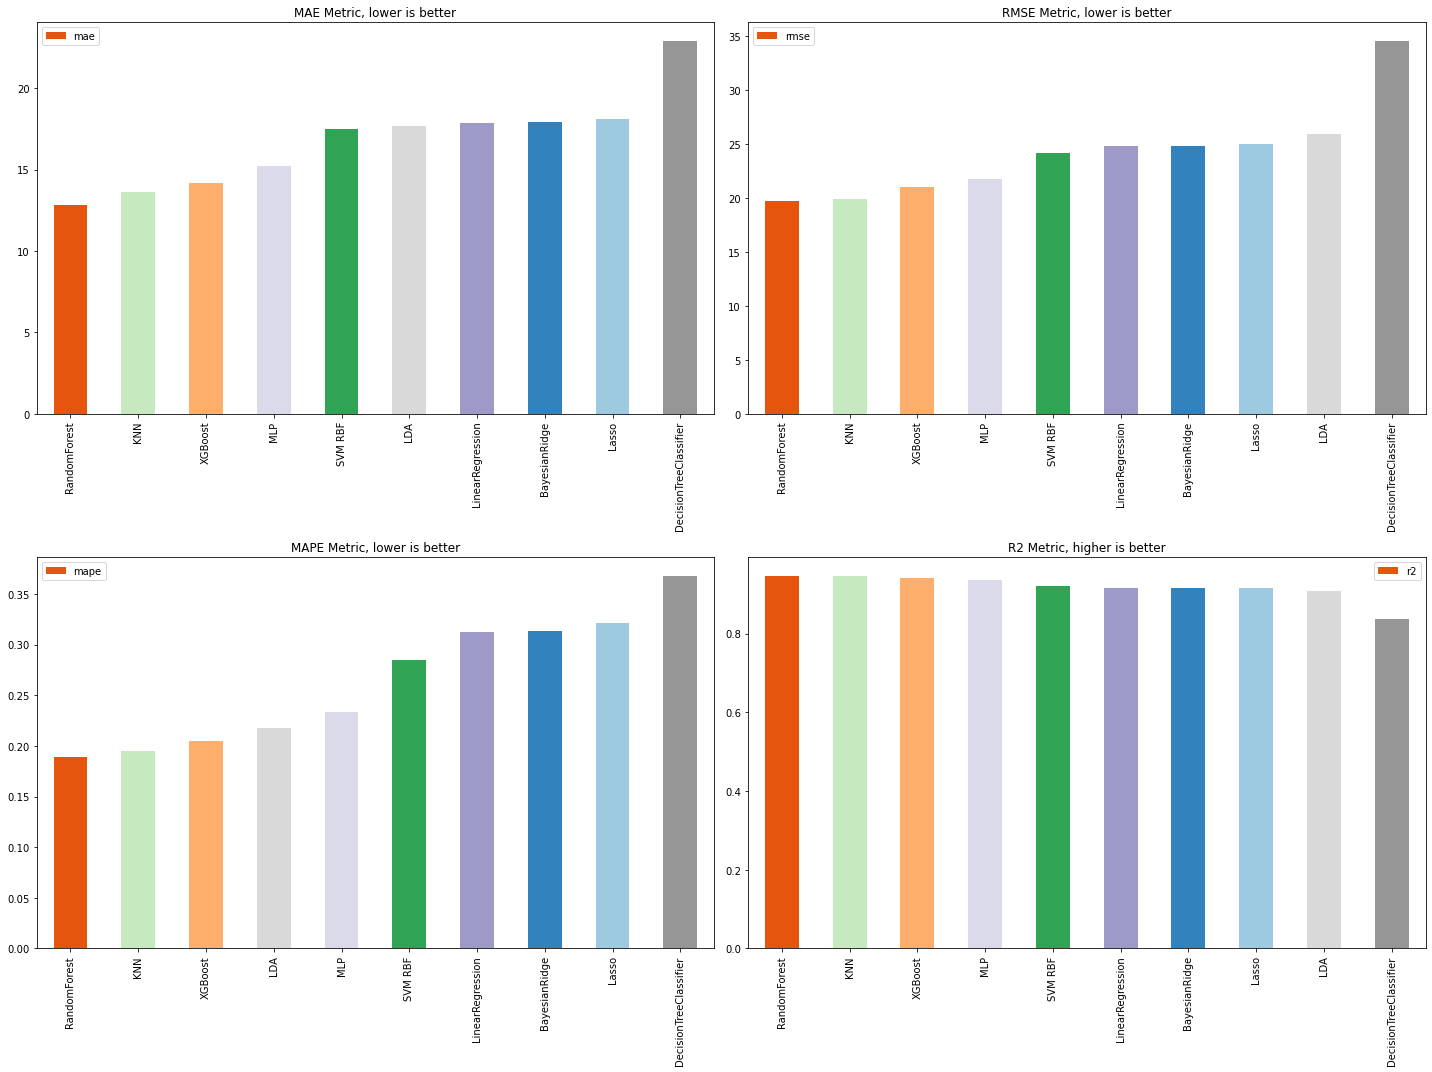

In [32]:
bar_metrics(resultsDict)

In [34]:
resultsDict

{'BayesianRidge': {'mae': 17.926866059196374,
  'rmse': 24.802088237445417,
  'mape': 0.3138155708017384,
  'r2': 0.9164853033069176},
 'Lasso': {'mae': 18.113613345509062,
  'rmse': 24.99247635051399,
  'mape': 0.3217032054830757,
  'r2': 0.9151982154869239},
 'RandomForest': {'mae': 12.803032258064514,
  'rmse': 19.66336280431691,
  'mape': 0.18956485723117847,
  'r2': 0.9475069271372495},
 'XGBoost': {'mae': 14.180501913255261,
  'rmse': 20.957242379184095,
  'mape': 0.20521224793047,
  'r2': 0.940371390205117},
 'SVM RBF': {'mae': 17.48884373744746,
  'rmse': 24.14622623523518,
  'mape': 0.28532102977322876,
  'r2': 0.9208437990259191},
 'KNN': {'mae': 13.594946507358799,
  'rmse': 19.866533925405825,
  'mape': 0.19536434170546133,
  'r2': 0.9464165566990972},
 'LinearRegression': {'mae': 17.874471410235813,
  'rmse': 24.786928450919735,
  'mape': 0.3122374689352859,
  'r2': 0.9165873655230427},
 'MLP': {'mae': 15.240207736677407,
  'rmse': 21.700169917954995,
  'mape': 0.233759414

In [ ]:
lightGBM = lgb.LGBMRegressor()
lightGBM.fit(X_train, y_train)
yhat = lightGBM.predict(X_test)
resultsDict['Lightgbm'] = evaluate(y_test, yhat)
predictionsDict['Lightgbm'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

In [ ]:
logreg.predict_proba(X_test)[:,0]

In [ ]:


# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]



In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

In [ ]:
cutoff = 0.7                                               # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_LinearRegression_pred)    # initialise a matrix full with zeros
y_pred_classes[y_LinearRegression_pred > cutoff] = 1       # add a 1 if the cutoff was breached
y_LinearRegression_pred

In [ ]:
y_test_classes = np.zeros_like(y_LinearRegression_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
metrics.accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
print('Mean absolute error: %.2f'% metrics.mean_absolute_error(y_test, y_LinearRegression_pred))

KNN

In [ ]:
cutoff = 0.7                                  # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_knn_pred)    # initialise a matrix full with zeros
y_pred_classes[y_knn_pred > cutoff] = 1       # add a 1 if the cutoff was breached

In [ ]:
y_test_classes = np.zeros_like(y_knn_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
metrics.accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
print('Mean absolute error: %.2f'% metrics.mean_absolute_error(y_test, y_knn_pred))

RandomForest

In [ ]:
cutoff = 0.7                                  # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_forest_pred)    # initialise a matrix full with zeros
y_pred_classes[y_forest_pred > cutoff] = 1       # add a 1 if the cutoff was breached

In [ ]:
y_test_classes = np.zeros_like(y_forest_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
metrics.accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
print('Mean absolute error: %.2f'% metrics.mean_absolute_error(y_test, y_forest_pred))

MLP

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(75, 25), learning_rate='adaptive', verbose=True,
                   activation='relu', solver='lbfgs', max_iter=500,random_state=140)
mlp.fit(t_X_train, y_train)
y_mlp_pred = mlp.predict(t_X_test)
print("Mean squared error: %.2f" % np.mean(y_mlp_pred - y_test) ** 2)
print('R^2: %.2f' % metrics.r2_score(y_test, y_mlp_pred))
score['mlp'] = mlp.score(t_X_test, y_test)
print('Variance score: %.3f' % score['mlp'])

In [ ]:
cutoff = 0.7                                  # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_mlp_pred)    # initialise a matrix full with zeros
y_pred_classes[y_mlp_pred > cutoff] = 1 

In [ ]:
y_test_classes = np.zeros_like(y_mlp_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
metrics.accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
print('Mean absolute error: %.2f'%metrics.mean_absolute_error(y_test, y_mlp_pred))

In [ ]:
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(t_X_train, y_train)
y_Lasso_pred = Lasso.predict(t_X_test)
print("Mean squared error: %.2f" % np.mean(y_Lasso_pred - y_test) ** 2)
print('R^2: %.2f' % metrics.r2_score(y_test, y_Lasso_pred))
score['Lasso'] = Lasso.score(t_X_test, y_test)
print('Variance score: %.3f' % score['Lasso'])

In [ ]:
cutoff = 0.7                                  # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_Lasso_pred)    # initialise a matrix full with zeros
y_pred_classes[y_Lasso_pred > cutoff] = 1       # add a 1 if the cutoff was breached

In [ ]:
y_test_classes = np.zeros_like(y_Lasso_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
metrics.accuracy_score(y_test_classes, y_pred_classes)

In [ ]:
x=df.drop('Mortality',axis=1)
y=df['Mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)
y_test

In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
X_train_df

In [ ]:
from utils.metrics import evaluate

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(df_test.Mortality, yhat)
predictionsDict['BayesianRidge'] = yhat